In [1]:
import pandas as pd
import numpy as np
black_friday_data = pd.read_csv("BlackFriday.csv")
black_friday_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [2]:
black_friday_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [3]:
import matplotlib.pyplot as plt

age_range = pd.unique(black_friday_data["Age"])
plt.figure(figsize=(7, 7))

prices = []
for age in age_range:
    index_of_age = black_friday_data.Age == age
    prices.append(black_friday_data.Purchase[index_of_age].sum())
print(prices)
plt.bar(age_range, prices )
plt.xlabel("age")
plt.ylabel("Purchase")
plt.show()

[132659006, 197614842, 1999749106, 413418223, 361908356, 1010649565, 901669280]


<Figure size 700x700 with 1 Axes>

['2' '4+' '3' '1' '0']


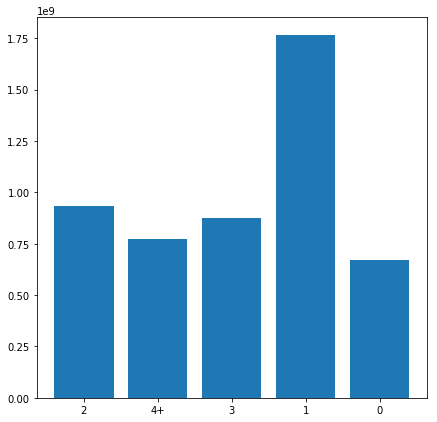

In [4]:
plt.figure(figsize=(7, 7))
city_stay = pd.unique(black_friday_data.Stay_In_Current_City_Years)
prices = []
for year in city_stay:
    stay_index = black_friday_data.Stay_In_Current_City_Years == year
    prices.append(black_friday_data.Purchase[stay_index].sum())
print(city_stay)
plt.bar(city_stay, prices)
plt.show()


[2966289500, 2051378878]


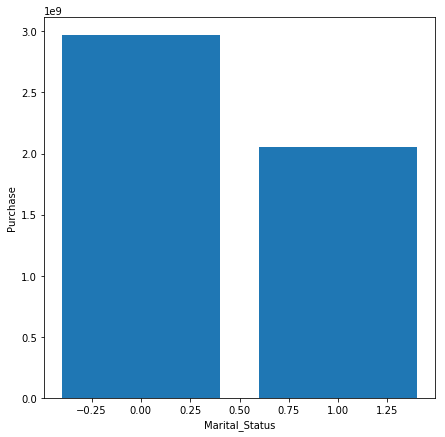

In [5]:
Marital_Status_range = pd.unique(black_friday_data["Marital_Status"])
plt.figure(figsize=(7, 7))

counts = []
for marital_Status in Marital_Status_range:
    index_of_marital_Status = black_friday_data.Marital_Status == marital_Status
    counts.append(black_friday_data.Purchase[index_of_marital_Status].sum())
print(counts)
plt.bar(Marital_Status_range, counts )
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.show()

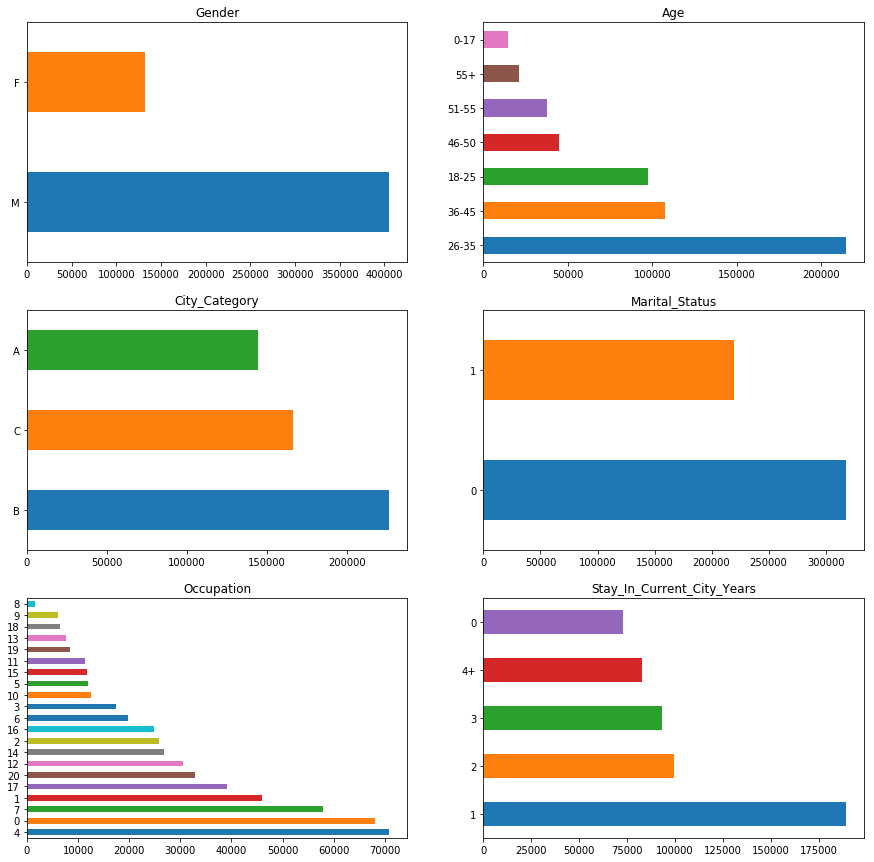

In [6]:


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[15, 15])

black_friday_data['Gender'].value_counts().plot(kind='barh', ax=axes[0,0], title='Gender')
black_friday_data['Age'].value_counts().plot(kind='barh', ax=axes[0,1], title='Age')
black_friday_data['City_Category'].value_counts().plot(kind='barh', ax=axes[1,0], title='City_Category')
black_friday_data['Marital_Status'].value_counts().plot(kind='barh', ax=axes[1,1], title='Marital_Status')
black_friday_data['Occupation'].value_counts().plot(kind='barh', ax=axes[2,0], title='Occupation')
black_friday_data['Stay_In_Current_City_Years'].value_counts().plot(kind='barh', ax=axes[2,1], title='Stay_In_Current_City_Years')



In [7]:
for  column in black_friday_data.columns:
    null_count = black_friday_data[column].isnull().sum()
    print (column, null_count)

User_ID 0
Product_ID 0
Gender 0
Age 0
Occupation 0
City_Category 0
Stay_In_Current_City_Years 0
Marital_Status 0
Product_Category_1 0
Product_Category_2 166986
Product_Category_3 373299
Purchase 0


Fill missing values with zeros 

In [8]:
black_friday_data['Product_Category_2'].fillna(0, inplace=True)
black_friday_data['Product_Category_3'].fillna(0, inplace=True)
black_friday_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [9]:
black_friday_data['Gender'].replace(('M', 'F'), (1, 0), inplace=True)


dummy_fields = ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
                'Product_Category_1','Product_Category_2']
for each in dummy_fields:
    dummies = pd.get_dummies(black_friday_data[each], prefix=each, drop_first=False)
    black_friday_data = pd.concat([black_friday_data, dummies], axis=1)

fields_to_drop = ['User_ID','Product_ID','Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
                  'Product_Category_1','Product_Category_2','Product_Category_3']
data = black_friday_data.drop(fields_to_drop, axis=1)
data.head()

,Gender,Marital_Status,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,0,0,8370,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,15200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1422,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1057,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,7969,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0



# Scaling target variables

To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.


In [10]:
# mean, std = data["Purchase"].mean(), data["Purchase"].std()
# data.loc[:, "Purchase"] = (data["Purchase"] - mean)/std
# data.head()

### Splitting the data into training, testing, and validation sets

We'll save  approximately 40% data as validation and test  set after we've trained the network. We'll use this set to make predictions and compare them with the actual numbers.


In [11]:
# Save data for approximately the last 21 days 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['Purchase']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]


train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [12]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import SGD



Using TensorFlow backend.


In [23]:
model = Sequential()
model.add(Dense(51, input_dim=train_features.shape[1]))
model.add(Activation("sigmoid"))
model.add(Dense(1))

sgd = SGD(0.01)

model.compile(loss='mse', optimizer=sgd, metrics = ['mse'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 51)                3825      
_________________________________________________________________
activation_4 (Activation)    (None, 51)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 52        
Total params: 3,877
Trainable params: 3,877
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(train_features, train_targets, epochs=40, verbose=1)

Epoch 1/40
535633/535633 [==============================] - 23s 43us/step - loss: 23440826.5498 - mean_squared_error: 23440826.5498
Epoch 2/40
535633/535633 [==============================] - 24s 46us/step - loss: 24314874.3678 - mean_squared_error: 24314874.3678
Epoch 3/40
535633/535633 [==============================] - 23s 43us/step - loss: 19824559.4326 - mean_squared_error: 19824559.4326
Epoch 4/40
535633/535633 [==============================] - 22s 42us/step - loss: 17573408.6095 - mean_squared_error: 17573408.6095
Epoch 5/40
535633/535633 [==============================] - 22s 41us/step - loss: 15617533.0699 - mean_squared_error: 15617533.0699
Epoch 6/40
535633/535633 [==============================] - 22s 41us/step - loss: 15169371.9778 - mean_squared_error: 15169371.9778
Epoch 7/40
535633/535633 [==============================] - 22s 41us/step - loss: 15371928.9027 - mean_squared_error: 15371928.9027
Epoch 8/40
535633/535633 [==============================] - 23s 42us/step - 

In [25]:
score = model.evaluate(test_features, test_targets)
print("\nAccuracy: ", score)


504/504 [==============================] - 0s 141us/step

Accuracy:  [12356287.30952381, 12356287.30952381]


/Users/owner/anaconda3/envs/black_env/lib/python3.6/site-packages/keras/engine/sequential.py:247: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


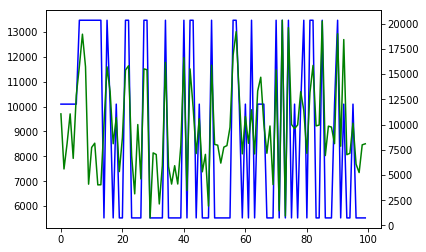

In [28]:
Purchase = model.predict_proba(test_features)

# plt.plot(Purchase_predict, "ro")
# plt.plot(test_targets,"bo")
Purchase_predict = pd.DataFrame({'Column1':Purchase[0:100,0], 'Column2':test_targets.values[0:100,0]})
plt.figure()
Purchase_predict.Column1.plot( style='b')
Purchase_predict.Column2.plot(secondary_y=True, style='g')

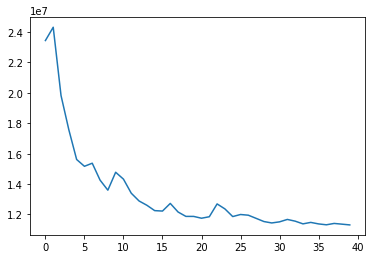

In [29]:
plt.plot(history.history['mean_squared_error'])

In [ ]:
# Save data for approximately the last 21 days 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['Marital_Status']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]


train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [ ]:
model = Sequential()
model.add(Dense(51, input_dim=train_features.shape[1]))
model.add(Activation("sigmoid"))
model.add(Dense(1))

sgd = SGD(0.01)

model.compile(loss='mse', optimizer=sgd, metrics = ['mse'])

model.summary()